### 🔍Fake or Genuine? 

#### Data Set Information:
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

#### Attribute Information
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. kurtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

Dataset: https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

UCI: http://archive.ics.uci.edu/ml/datasets/banknote+authentication

#### Importing Libraries

In [1]:
! pip install pyforest
from pyforest import*

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=067001c4527f4b1dd1a5fa325900368e1cc92532ab61ba2837b99617f31f32b3
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [2]:
lazy_imports()

['import statsmodels.api as sm',
 'from sklearn.ensemble import RandomForestRegressor',
 'from openpyxl import load_workbook',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.decomposition import PCA',
 'import nltk',
 'import fbprophet',
 'import seaborn as sns',
 'import cv2',
 'import tensorflow as tf',
 'import re',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import pandas as pd',
 'import statistics',
 'from sklearn.linear_model import LogisticRegression',
 'import spacy',
 'import numpy as np',
 'import plotly.express as px',
 'import gensim',
 'from sklearn import metrics',
 'from scipy import stats',
 'from PIL import Image',
 'from dask import dataframe as dd',
 'import textblob',
 'import matplotlib.pyplot as plt',
 'import pydot',
 'from sklearn.model_selection import KFold',
 'import keras',
 'from sklearn.manifold import TSNE',
 'from sklearn.preprocessing import StandardScaler',
 'import plotly.graph_objs as go',
 'import bokeh',
 'from sk

#### Importing Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Everything/M. Tech/IIT Bhilai Mechatronics/Courses/Full Stack Data Scientist/Projects/1. Bank Note Analysis/BankNote_Authentication.csv')

<IPython.core.display.Javascript object>

#### Exploratory Data Analysis

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.shape

(1372, 5)

In [6]:
# To check data imbalance
# If your data is imbalanced, there are several ways to balance it like upsampling.

df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [7]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

#### Visualizations

##### Univariate Data Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-9-33b56a088434>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'], color='red')


<Axes: title={'center': 'Distribution of "Class" Attribute'}, xlabel='class', ylabel='Density'>

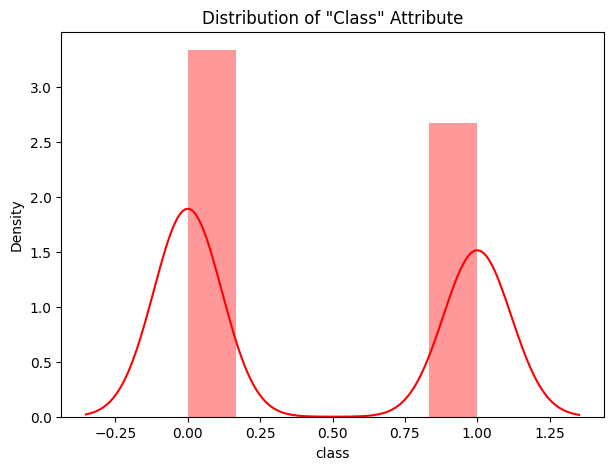

In [9]:
plt.figure(figsize=(7,5))   
plt.title('Distribution of "Class" Attribute')

sns.distplot(df['class'], color='red')

##### Multivariate Data Visualization

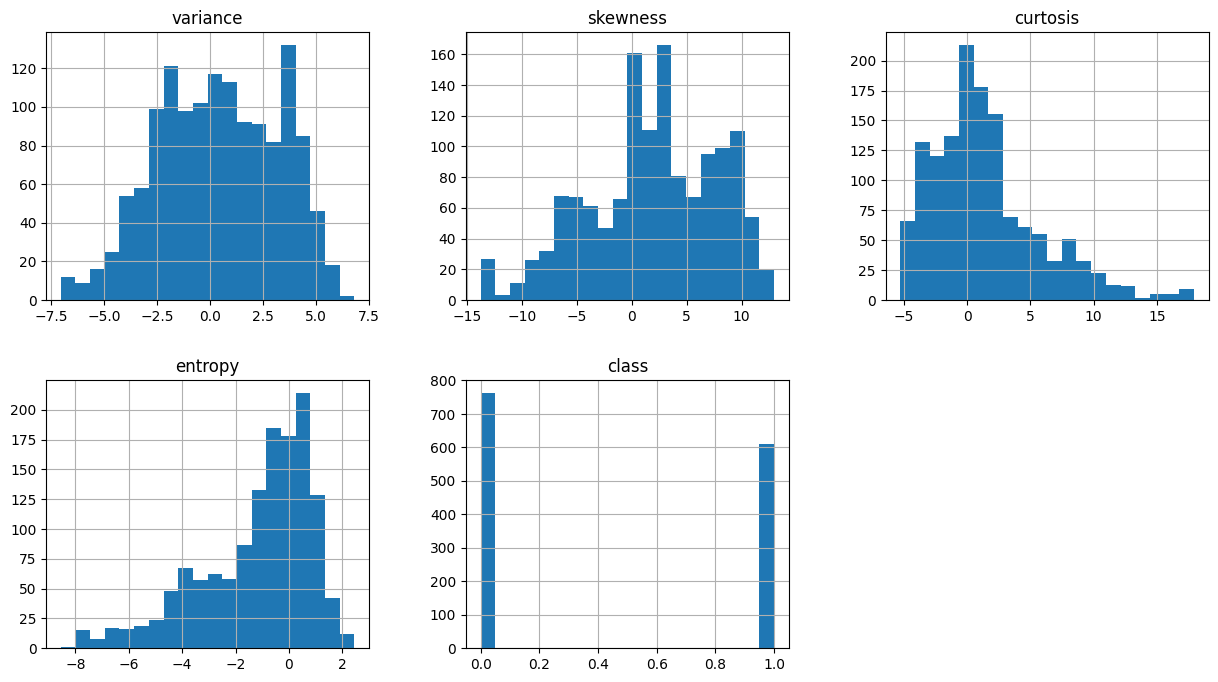

In [10]:
df.hist(bins=20, figsize=(15,8), layout=(2,3)); # Histogram of all the attributes

In [11]:
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

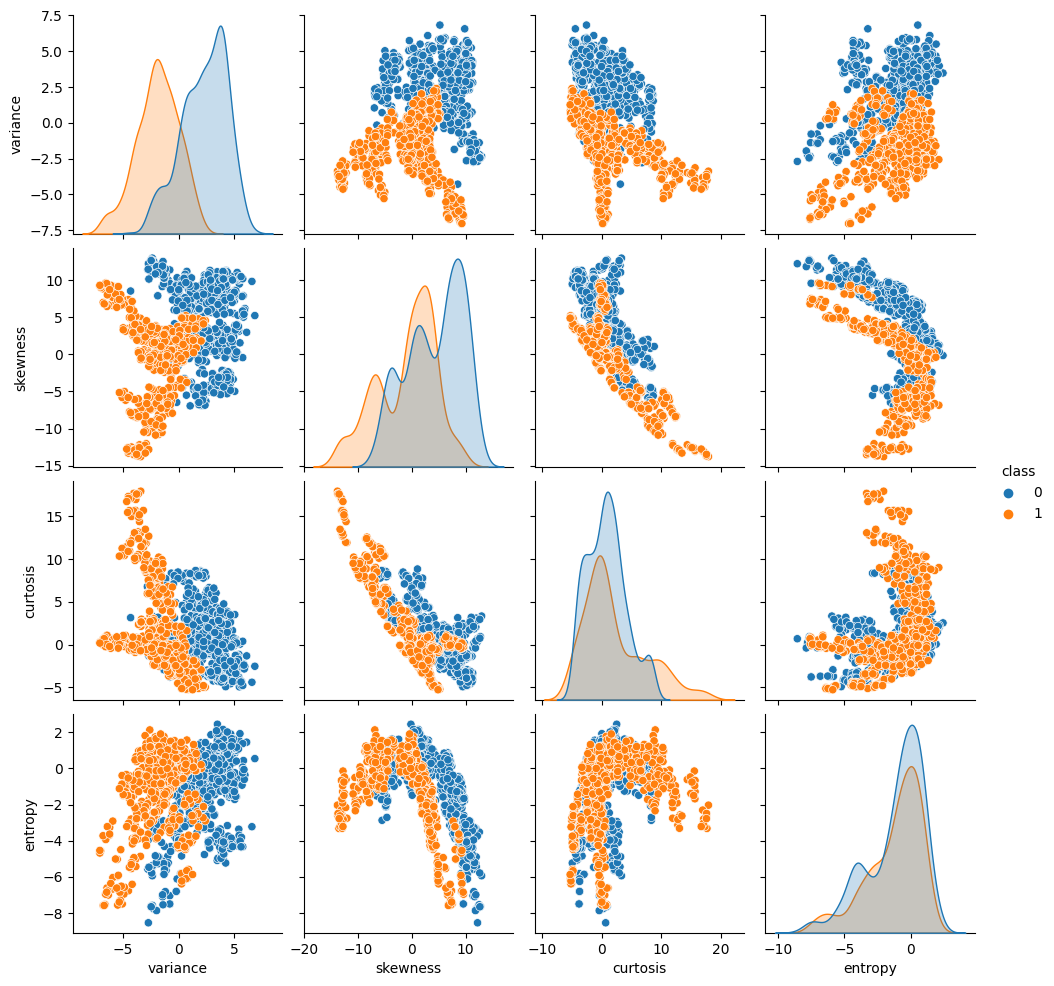

In [12]:
sns.pairplot(df, hue="class")

#### Data Preperation

In [13]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


##### Creating train and test dataset

In [14]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

##### Scaling dataset

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[-1.02485262, -0.37835618,  0.01991633,  0.33617419],
       [-0.40377191,  0.18046995, -1.1651975 , -0.94766669],
       [ 1.09609403, -0.2107457 ,  0.14950407,  1.48100839],
       ...,
       [ 0.17500186, -0.99858514,  0.78776995,  0.41401964],
       [-1.24833025, -1.4942034 ,  2.18597098,  0.12920264],
       [ 0.1188454 ,  1.25043701, -0.60412477, -0.16118533]])

In [18]:
y_train.head()

1212    1
1202    1
549     0
589     0
1258    1
Name: class, dtype: int64

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# We use 'liblinear' for small to medium sized dataset
classifier = LogisticRegression(solver='liblinear', random_state=64)
classifier.fit(X_train, y_train)

# cv: Determines the cross-validation splitting strategy (How many folds, default is 5-folds) Evaluate a score by cross-validation; estimator: object to use to fit the data.
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=10) 
print("Accuracies:\n", accuracies)

print("Mean Accuracy: ", accuracies.mean())

Accuracies:
 [0.96363636 0.98181818 0.96363636 0.98181818 0.97272727 1.
 0.99090909 0.98165138 0.99082569 0.99082569]
Mean Accuracy:  0.9817848206839033


In [20]:
y_test_pred = classifier.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9745454545454545

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Confusion Matrix For Logistic Regression'}>

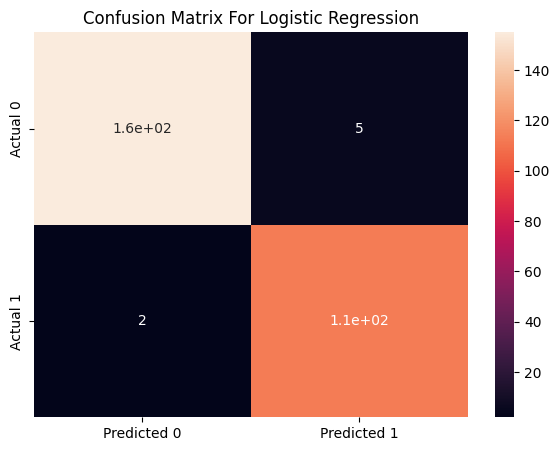

In [21]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_test_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual 0','Actual 1']],
                  columns = [i for i in ["Predicted 0","Predicted 1"]])
plt.figure(figsize = (7,5))
plt.title('Confusion Matrix For Logistic Regression')
sns.heatmap(df_cm, annot=True)

#### Support Vector Machine(SVM)

In [22]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state = 64)
svm_classifier.fit(X_train,y_train)

svm_accuracies=cross_val_score(estimator=svm_classifier, X=X_train, y=y_train, cv=10)
print("Accuracies:\n",svm_accuracies)

print("Mean Accuracy: ", svm_accuracies.mean())

Accuracies:
 [0.99090909 0.99090909 0.98181818 0.99090909 0.98181818 1.
 0.99090909 0.98165138 0.99082569 0.99082569]
Mean Accuracy:  0.9890575479566305


In [23]:
svm_pred = svm_classifier.predict(X_test)
accuracy_score(y_test, svm_pred)

0.9818181818181818

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Confusion Matrix For Support Vector Machine (linear)'}>

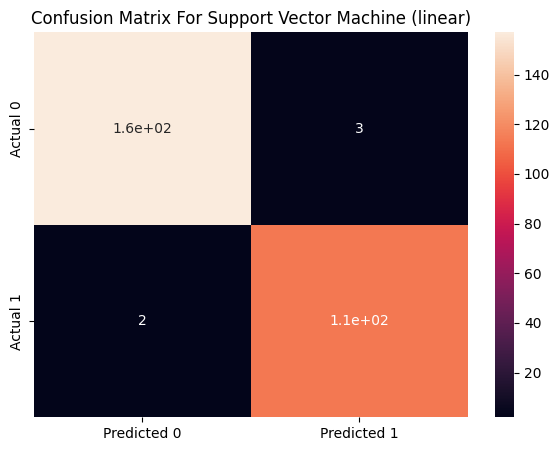

In [24]:
cm = metrics.confusion_matrix(y_test, svm_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual 0','Actual 1']],
                  columns = [i for i in ["Predicted 0","Predicted 1"]])
plt.figure(figsize = (7,5))
plt.title('Confusion Matrix For Support Vector Machine (linear)')
sns.heatmap(df_cm, annot=True)

#### Support Vector Machine('rbf')
Kernels in SVM classification refer to the function that is responsible for defining the decision boundaries between the classes. Apart from the classic linear kernel which assumes that the different classes are separated by a straight line, a RBF (radial basis function) kernel is used when the boundaries are hypothesized to be curve-shaped.

RBF kernel uses two main parameters, gamma and C that are related to:

1. the decision region (how spread the region is), and
2. the penalty for misclassifying a data point

In [25]:
from sklearn.svm import SVC

svm_rbf_classifier = SVC(kernel='rbf', gamma='auto', random_state=64)
svm_rbf_classifier.fit(X_train, y_train)

svm_rbf_accuracies = cross_val_score(estimator=svm_rbf_classifier, X=X_test, y=y_test, cv=10)
print("Accuracies:\n", svm_rbf_accuracies)

print("Mean Accuracy: ", svm_rbf_accuracies.mean())

Accuracies:
 [1.         1.         0.96428571 1.         1.         0.96296296
 1.         1.         1.         0.96296296]
Mean Accuracy:  0.9890211640211641


In [26]:
svm_rbf_pred = svm_rbf_classifier.predict(X_test)
accuracy_score(y_test, svm_rbf_pred)

1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Confusion Matrix For Support Vector Machine (rbf)'}>

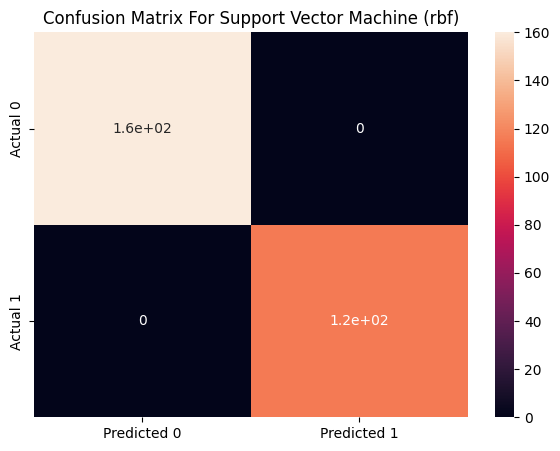

In [27]:
cm = metrics.confusion_matrix(y_test, svm_rbf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual 0','Actual 1']],
                  columns = [i for i in ["Predicted 0","Predicted 1"]])
plt.figure(figsize = (7,5))
plt.title('Confusion Matrix For Support Vector Machine (rbf)')
sns.heatmap(df_cm, annot=True)

#### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rdf_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=64)
rdf_classifier.fit(X_train,y_train)
rdf_accuracies = cross_val_score(estimator=rdf_classifier, X=X_test, y=y_test, cv=10)
 
print("Accuracies:\n", rdf_accuracies)
print("Mean Accuracy: ", rdf_accuracies.mean())

Accuracies:
 [0.92857143 1.         1.         1.         0.96428571 1.
 0.96296296 0.96296296 1.         0.92592593]
Mean Accuracy:  0.9744708994708995


In [29]:
rdf_pred = rdf_classifier.predict(X_test)
accuracy_score(y_test, rdf_pred)

0.9963636363636363

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Confusion Matrix For Random Forest Classifier'}>

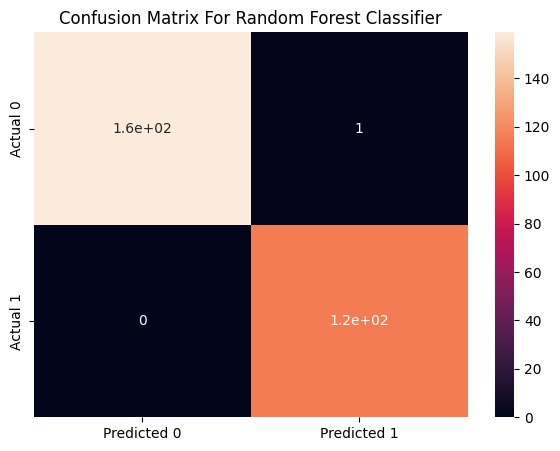

In [30]:
cm = metrics.confusion_matrix(y_test, rdf_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual 0','Actual 1']],
                  columns = [i for i in ["Predicted 0","Predicted 1"]])
plt.figure(figsize = (7,5))
plt.title('Confusion Matrix For Random Forest Classifier')
sns.heatmap(df_cm, annot=True)

#### K-Nearest Neighbours

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

param_grid = {
    'leaf_size' : [2,5,7,9,11],
    'n_neighbors' : [2,5,7,9,11],
    'p' : [1,2]    
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [32]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [33]:
final_KNN_Model = grid.best_estimator_

In [34]:
KNN = KNeighborsClassifier(n_neighbors=2, p=1, leaf_size=2)
KNN.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [35]:
KNN_predicted = KNN.predict(X_test)
accuracy_score(y_test, KNN_predicted)

1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Confusion Matrix For K Neighbour Classifier'}>

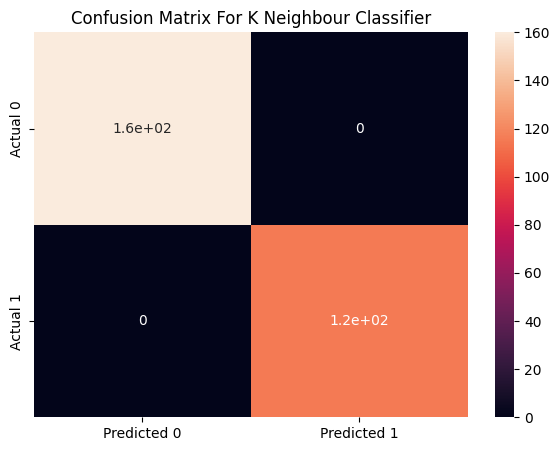

In [36]:
cm = metrics.confusion_matrix(y_test, KNN_predicted, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual 0','Actual 1']],
                  columns = [i for i in ["Predicted 0","Predicted 1"]])
plt.figure(figsize = (7,5))
plt.title('Confusion Matrix For K Neighbour Classifier')
sns.heatmap(df_cm, annot=True)

#### Multilayer Perceptron

In [37]:
from sklearn.neural_network import MLPClassifier
multi_classifier=MLPClassifier(hidden_layer_sizes=(8,4), max_iter=8000, alpha=0.0001, solver='sgd', verbose=10,  random_state=64, tol=0.000000001)
multi_classifier.fit(X_train, y_train)
multi_accuracies=cross_val_score(estimator=multi_classifier, X=X_test, y=y_test, cv=10)

print("Accuracies:\n", multi_accuracies)
print("Mean Accuracy: ", multi_accuracies.mean())

Streaming output truncated to the last 5000 lines.
Iteration 3005, loss = 0.01083581
Iteration 3006, loss = 0.01082964
Iteration 3007, loss = 0.01082380
Iteration 3008, loss = 0.01081924
Iteration 3009, loss = 0.01081359
Iteration 3010, loss = 0.01080633
Iteration 3011, loss = 0.01079979
Iteration 3012, loss = 0.01079353
Iteration 3013, loss = 0.01078647
Iteration 3014, loss = 0.01078129
Iteration 3015, loss = 0.01077491
Iteration 3016, loss = 0.01076864
Iteration 3017, loss = 0.01076266
Iteration 3018, loss = 0.01075759
Iteration 3019, loss = 0.01075124
Iteration 3020, loss = 0.01074684
Iteration 3021, loss = 0.01073904
Iteration 3022, loss = 0.01073247
Iteration 3023, loss = 0.01072636
Iteration 3024, loss = 0.01072063
Iteration 3025, loss = 0.01071357
Iteration 3026, loss = 0.01070830
Iteration 3027, loss = 0.01070161
Iteration 3028, loss = 0.01069569
Iteration 3029, loss = 0.01068974
Iteration 3030, loss = 0.01068393
Iteration 3031, loss = 0.01067811
Iteration 3032, loss = 0.010671

In [38]:
multi_predicted = multi_classifier.predict(X_test)
accuracy_score(y_test,multi_predicted)

1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Confusion Matrix For Multi Layer Perceptron'}>

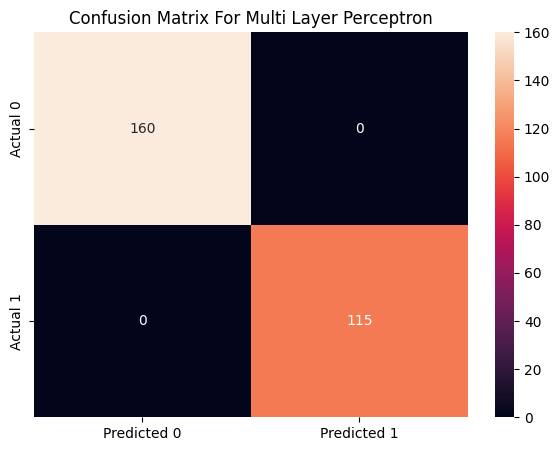

In [51]:
cm = metrics.confusion_matrix(y_test, multi_predicted, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ['Actual 0','Actual 1']],
                  columns = [i for i in ["Predicted 0","Predicted 1"]])
plt.figure(figsize = (7,5))
plt.title('Confusion Matrix For Multi Layer Perceptron')
sns.heatmap(df_cm, annot=True, fmt='d')

#### Printing accuracy of each algorithm

In [40]:
print("LogisticRegression:", accuracy_score(y_test, y_test_pred))
print("Support Vector Machine (using kernel=linear):", accuracy_score(y_test, svm_pred))
print("Support Vector Machine (using kernel=rbf):", accuracy_score(y_test, svm_rbf_pred))
print("RandomForestClassifier:", accuracy_score(y_test, rdf_pred))
print("KNeighborsClassifier:", accuracy_score(y_test, KNN_predicted))
print("MLPClassifier:", accuracy_score(y_test, multi_predicted))

LogisticRegression: 0.9745454545454545
Support Vector Machine (using kernel=linear): 0.9818181818181818
Support Vector Machine (using kernel=rbf): 1.0
RandomForestClassifier: 0.9963636363636363
KNeighborsClassifier: 1.0
MLPClassifier: 1.0


#### Checking for any random data point

In [41]:
multi_classifier.predict([[3.5, 8.9, -3.8, -0.55]])

array([0])